In [52]:
from numpy import *
from numpy.fft import fft
import matplotlib.pyplot as plt
from LabFuncs import *
from Params import *
from HaloFuncs import *
from WIMPFuncs import *

dat = loadtxt('../data/gvmin/gvmin_Halo.txt')
v_min = dat[0,:]
gmin_Halo = dat[1:,:]
gmin_Halo_gf = loadtxt('../data/gvmin/gvmin_Halo_GF.txt',skiprows=1)

gmin_Saus = loadtxt('../data/gvmin/gvmin_Saus.txt',skiprows=1)
gmin_Saus_gf = loadtxt('../data/gvmin/gvmin_Saus_GF.txt',skiprows=1)

gmin_sub = loadtxt('../data/gvmin/gvmin_Shards.txt',skiprows=1)
gmin_sub_gf = loadtxt('../data/gvmin/gvmin_Shards_GF.txt',skiprows=1)

eta = 0.2
gmin0 = (1-eta)*gmin_Halo + eta*gmin_Saus
gmin0_gf = (1-eta)*gmin_Halo_gf + eta*gmin_Saus_gf

nv = size(v_min)
nt = shape(gmin0)[0]
t = linspace(0,365-365/(1.0*nt),nt)



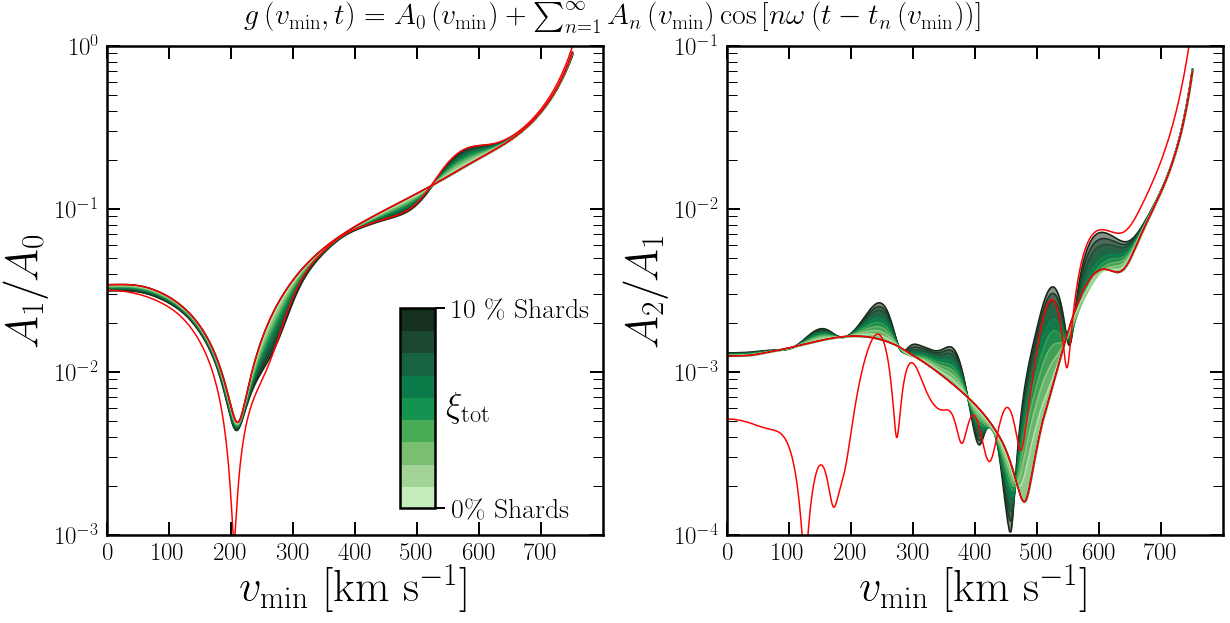

In [53]:
from PlotFuncs import *
import cmocean

from numpy.fft import fft

# Get all fourier components
def FourierComponents(gmin,nc):
    nv = shape(gmin)[1]
    a0 = zeros(shape=nv)
    b = zeros(shape=(nc,nv))
    a = zeros(shape=(nc,nv))
    for i in range(0,nv):
        y = gmin[:,i]
        yfft = fft(y)/(1.0*nt)
        yfft = yfft[0:(nc+1)]
        a0[i] = real(yfft[0])
        a[:,i] = 2*real(yfft[1:])
        b[:,i] = -2*imag(yfft[1:])
    return a0,a,b

nc = 4
a0,a,b = FourierComponents(gmin0_gf,nc) 
a0_gf,a_gf,b_gf = FourierComponents(0.8*gmin0_gf+0.2*gmin_sub_gf,nc)


fig,ax1,ax2 = MyDoublePlot(r'$v_{\rm min}$ [km s$^{-1}$]',r'$A_1/A_0$',r'$v_{\rm min}$ [km s$^{-1}$]',r'$A_2/A_1$',size_y=9,wspace=0.25)

n_xi = 10
xi_max = 0.1
xi_vals = flipud(linspace(0.0,xi_max,n_xi))



j = 0
zorder=0
col = (cmocean.cm.algae_r(linspace(0,1,n_xi)))
A0_0,a_1,b_1 = FourierComponents(gmin0_gf,nc) 
A1_0 = sqrt(a_1[0,:]**2.0+b_1[0,:]**2.0)
A2_0 = sqrt(a_1[1,:]**2.0+b_1[1,:]**2.0)
for i in range(0,n_xi):
    xi = xi_vals[i]
    A0,a,b = FourierComponents((1-xi)*gmin0_gf+xi*gmin_sub_gf,nc)
    A1 = sqrt(a[0,:]**2.0+b[0,:]**2.0)
    A2 = sqrt(a[1,:]**2.0+b[1,:]**2.0)
    
    ax1.fill_between(v_min,A1/A0,y2=A1_0/A0_0,color=col[i,:],alpha=0.5,zorder=zorder)
    ax1.plot(v_min,A1/A0,'-',color=col[i,:],zorder=zorder)
    
    ax2.fill_between(v_min,A2/A0,y2=A2_0/A0_0,color=col[i,:],alpha=0.5,zorder=zorder)
    ax2.plot(v_min,A2/A0,'-',color=col[i,:],zorder=zorder)
ax1.plot(v_min,A1_0/A0_0,'k-',lw=1.5,zorder=zorder)
ax2.plot(v_min,A2_0/A0_0,'k-',lw=1.5,zorder=zorder)




    
# Without GF
ax1.plot(v_min,A1_0/A0_0,'r-',lw=1.5,zorder=zorder+1)
ax2.plot(v_min,A2_0/A0_0,'r-',lw=1.5,zorder=zorder+1)

A0,a,b = FourierComponents((1-xi_max)*gmin0+xi_max*gmin_sub,nc)
A1 = sqrt(a[0,:]**2.0+b[0,:]**2.0)
A2 = sqrt(a[1,:]**2.0+b[1,:]**2.0)
ax1.plot(v_min,A1/A0,'r-',lw=1.5,zorder=zorder+1)
ax2.plot(v_min,A2/A0,'r-',lw=1.5,zorder=zorder+1)




ax1.set_yscale('log')
ax1.set_ylim([1e-3,1e0])
ax1.set_xlim([0,800])

ax2.set_yscale('log')
ax2.set_ylim([1e-4,1e-1])
ax2.set_xlim([0,800])

ax1.set_xticks(arange(0,800,100))
ax2.set_xticks(arange(0,800,100))


# # Custom colorbar
plt.sca(ax2)
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'10 \% Shards'
cbar_min = r'0\% Shards'
cbaxes = inset_axes(ax2, width="5%", height="50%", bbox_to_anchor=[-180, -80, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.algae, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[3]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28)
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.36,0.3,r'$\xi_{\rm tot}$',fontsize=35,color='k')


eq = r'$g\left(v_{\min }, t\right)=A_{0}\left(v_{\min }\right)+\sum_{n=1}^{\infty} A_{n}\left(v_{\min }\right) \cos \left[n \omega\left(t-t_{n}\left(v_{\min }\right)\right)\right]$'
plt.gcf().text(0.22,0.9,eq,fontsize=30)

# Save figure
plt.show()
pltname = 'Shards_FourierA'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')


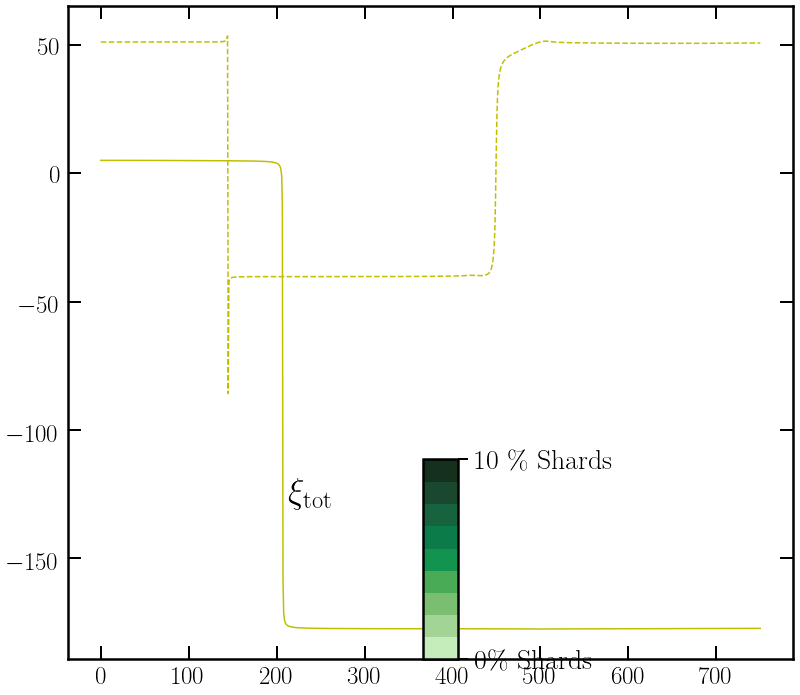

In [87]:
w = 2*pi/1.0
t0 = 0.18
def ti(a,b,n):
    ai = a[n-1,:]
    bi = b[n-1,:]
    nwt = n*w*t0
    ti = -(1.0/(n*w))*arctan2((ai*cos(nwt)+bi*sin(nwt)),(ai*sin(nwt)-bi*cos(nwt)))
    return ti 

fig,ax1 = MySquarePlot()

A0,a,b = FourierComponents(gmin_Halo,5)
plt.plot(v_min,365*(ti(a,b,2)),'y--',lw=1.5,zorder=zorder+1)
plt.plot(v_min,365*(ti(a,b,1)),'y-',lw=1.5,zorder=zorder+1)

#A0,a,b = FourierComponents(gmin_Saus,2)
#plt.plot(v_min,365*(-ti(a,b,2)),'k--',lw=1.5,zorder=zorder+1)
#plt.plot(v_min,365*(-ti(a,b,1)),'k-',lw=1.5,zorder=zorder+1)


#plt.yticks(cumsum([31,28,31,30,31,30,31,31,30,31,30,31])-31,
#           ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'], 
#           rotation=0)

#plt.ylim([130.0,365.0])
#plt.xlim([0.0,750.0])
ax1.set_xticks(arange(0,800,100))



# # Custom colorbar
import matplotlib as mpl
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
cbar_max = r'10 \% Shards'
cbar_min = r'0\% Shards'
cbaxes = inset_axes(ax1, width="5%", height="50%", bbox_to_anchor=[-180, -80, 700, 400]) 
norm = mpl.colors.Normalize(vmin=0,vmax=1)
sm = plt.cm.ScalarMappable(cmap=cmocean.cm.algae, norm=norm)
sm.set_array([])
plt.colorbar(sm,cax=cbaxes,ticks=(0,1),boundaries=linspace(0,1,n_xi))
f = plt.gcf().get_children()
cbar = f[2]
cbar.set_yticklabels([cbar_min, cbar_max])  # vertically oriented colorbar
cbar.tick_params(labelsize=28)
cbar.tick_params(which='major',direction='out',width=2,length=10,right=True,top=False,pad=7)
cbar.tick_params(which='minor',direction='out',width=2,length=7,right=True,top=False)
plt.gcf().text(0.36,0.3,r'$\xi_{\rm tot}$',fontsize=35,color='k')



# Save figure
plt.show()
pltname = 'Shards_Fouriert'
fig.savefig('../plots/'+pltname+'.pdf',bbox_inches='tight')
fig.savefig('../plots/plots_png/'+pltname+'.png',bbox_inches='tight')


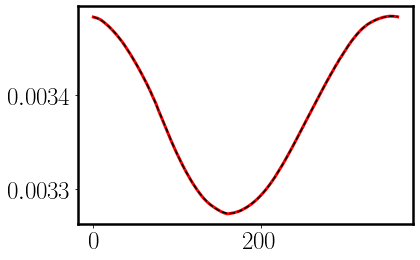

In [77]:
# Checking it works

th = linspace(0,2*pi-2*pi/nt,nt)
nc = 10
a = zeros(shape=(nc,1))
b = zeros(shape=(nc,1))


y = 0.1*gmin_sub_gf[:,0]+0.9*gmin0_gf[:,0]
yfft = fft(y)/(1.0*nt)
yfft = yfft[0:(nc+1)]
a0 = real(yfft[0])
a[:,0] = 2*real(yfft[1:])
b[:,0] = -2*imag(yfft[1:])


def FourierReconstruct(a0,a,b,nt):
    th = linspace(0,2*pi-2*pi/nt,nt)
    nc = size(a)
    n = zeros(shape=(nc,1))
    n[:,0] = arange(1,nc+1) 
    a = repeat(a, nt, axis=1)
    b = repeat(b, nt, axis=1)
    n = repeat(n, nt, axis=1)
    y_rec = a0 + sum(a*cos(n*th)+b*sin(n*th),axis=0)
    return y_rec
    
plt.plot(t,y,'r-',lw=3)
plt.plot(t,FourierReconstruct(a0,a,b,nt),'k--')

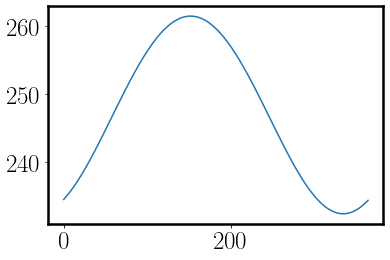

In [82]:
v_e = zeros(shape=nt)
for i in range(0,nt):
    v_e[i] = sqrt(sum(LabVelocitySimple(t[i])**2.0))
plt.plot(t,v_e)